In [150]:
import pandas as pd
import re
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from collections import defaultdict

### Project Name: Topic Modeling of a WhatsApp Group-Chat

#### Description
In this project, I'll take a WhatsApp group chat and categorize daily conversations into topics using **Non-Negative Matrix Factorization (NMF)**.

---
#### Two Important Disclaimer
1. To protect the privacy of participants:  
- All full names and personal details have been removed.  
- Media and sensitive content have been excluded.  
- The remaining content is intended for educational and analytical purposes, and all messages should be considered in a **humorous or lighthearted context**.  
- Please do not use or share this chat for any other purposes.

2. Specificity
- Whatsapp Conversation are messy, full of slang and drastically vary. I used a spesific set of stop words, and exluded some terms based on my personal knowledge of the chat. Hence, it is likely that the parameters and stopword list will not yield high quality results for different group chats. I chose my parameters based on trial and error with noe general rules applicable. 

---
#### Table of Contents

##### 1. Parsing the Chat
1.1. Load the data, remove WhatsApp-built-in characters, and combine some compounds into a single string.  
1.2. Load a list of common non-informative Hebrew words and conjunctions to count as **stop words**.  
1.3. Use WhatsApp’s built-in message system to divide conversations by day; afterwards, put all messages into a **DataFrame**.

##### 2. NMF (Non-Negative Matrix Factorization)
2.1. Vectorize the texts using **TF-IDF**.  
2.2. Fit the data to the **NMF model**.  
2.3. After NMF is complete, examine the top words in each cluster and assign a **topic title**.  
2.4. The second matrix of NMF scores how likely a document belongs to a topic; assign a topic to each document.  
2.5. After classification, examine the **distribution of topics**.


In [194]:
# 1. Parsing the Chat:
# 1.1 We Load the data, delete Whatsapp-built in charachters, and uniting some compunds into a single string   

In [195]:
def read_file(filepath):
    with open(filepath, encoding='utf-8') as f:
        str_text = f.read()
    return str_text

In [196]:
Terr_Chat = read_file("Terr_Chat_2.txt")

In [197]:
### delete Whatsapp charachters, and uniting some compunds into a single string   
Terr_Chat = Terr_Chat.replace("@", "")
Terr_Chat = Terr_Chat.replace("<Media omitted>", "")
Terr_Chat = re.sub(r'[\u2066-\u2069]', '', Terr_Chat)    
Terr_Chat = Terr_Chat.replace("message", "")
Terr_Chat = Terr_Chat.replace("תל אביב", "תלאביב")
Terr_Chat = Terr_Chat.replace("רמת גן", "רמתגן")

In [ ]:
# 1.2 We load a list of common non informative hebrew words and conjunctions
# that we will count as stop words

In [234]:
with open("hebrew_stopwords.json", "r", encoding="utf-8") as f:
    hebrew_stopwords = json.load(f)

print(len(hebrew_stopwords), "stopwords loaded")

316 stopwords loaded


In [200]:
# 1.3 We use the built in message stystem of whatsapp to divide the conversations by day
# afterwards we put them all in a dataframe  

# Your WhatsApp chat string
chat =Terr_Chat

# Regex to match WhatsApp lines with date, time, sender, and message
line_pattern = re.compile(r'^(\d{2}/\d{2}/\d{4}), \d{2}:\d{2} - (.+?): (.+)$')

# Collect messages by date
messages_by_day = defaultdict(list)

# Go through each line in the chat
for line in chat.strip().split('\n'):
    match = line_pattern.match(line.strip())
    if match:
        date, sender, message = match.groups()
        messages_by_day[date].append(f"{sender}: {message}")
    else:
        # Optionally handle multiline messages here
        pass

# Create the DataFrame
data = {
    'date': [],
    'conversation': []
}

for date, messages in messages_by_day.items():
    data['date'].append(date)
    data['conversation'].append(' '.join(messages))

df2 = pd.DataFrame(data)

# Show the result
df2.head()


,date,conversation
0,02/12/2022,איתי: location: https://maps.google.com/?q=32....
1,03/12/2022,אלון: חברים אני רוצה לבקש סליחה על ההברזה אלון...
2,04/12/2022,מרזן: חתיך סיטון מרזן: איפה אתם בבריכה? אסף סי...
3,05/12/2022,מרזן: אגב מי שרוצה Riseup מרזן: ואז אני אקבל 5...
4,06/12/2022,רועי: מרק ירקות רועי: בחבצלת רועי: זה קרוב ל10...


In [201]:
# 2. NMF (Non Negative Matrix Factorization)
# 2.1 We vectorize the texts using Tf-idf

In [203]:
tfidf = TfidfVectorizer(max_df = 0.8, min_df = 5, stop_words=hebrew_stopwords) 

In [204]:
dtm = tfidf.fit_transform(df2['conversation'])

In [205]:
# 2.2 We fit the data to the NMF

In [206]:
nmf = NMF(n_components=7, random_state=42)
nmf.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=7, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [207]:
# 2.3 We look at the top words in each of the concluded clusters and give it a topic title

In [208]:
for index, topic in enumerate(nmf.components_):
    print(f"top 15 words for topic {index}")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

top 15 words for topic 0
['מעניין', 'מוזר', 'הטינדר', 'שיר', 'חתונה', 'שלח', 'תן', 'אמרתי', 'בנים', 'אמרה', 'חחחחחחחחח', 'זוג', 'אחת', 'סליחה', 'אקר', 'תמונה', 'אל', 'בטרר', 'מוב', 'הודעה', 'מובאין', 'חחחח', 'דמות', 'איתה', 'הטרר', 'טרר', 'חחחחחחח', 'בת', 'שהיא', 'בנות']


top 15 words for topic 1
['במודיעין', 'בבית', 'לצאת', 'אשמח', 'ערב', 'דק', 'לאכול', 'אצלי', 'מקום', 'יוצאים', 'קפה', 'חומוס', 'אגיע', 'אבוא', 'בואו', 'פיצה', 'זורם', 'poll', 'בירה', 'בפנים', 'יוצא', 'באים', 'מוקדם', 'שישי', 'בערב', 'מאוחר', '21', 'בדרך', '30', '00']


top 15 words for topic 2
['אופניים', 'כסף', 'רכבת', 'אוטו', 'לנסוע', 'זול', 'דמות', 'רחוב', 'העיר', 'קרוב', 'חיים', 'דירות', 'ברמתגן', 'לתלאביב', 'בגבעתיים', 'רמתגן', 'הדירה', 'חניה', 'גר', 'יקר', 'חדרים', 'גבעתיים', 'רכב', 'במודיעין', 'מקום', 'מודיעין', 'דירה', 'תלאביב', 'בתלאביב', 'לגור']


top 15 words for topic 3
['לביבי', 'שמאל', 'העם', '14', 'הרפורמה', 'בעולם', 'בישראל', 'שביבי', 'במדינה', 'למדינה', 'ערוץ', 'חיים', 'חוק', 'ממשלה', 'המחאה', 'ראש', 

In [209]:
# topics 4 and 6 are not really clear, hence we will not count them
# we will use the next most likely topic for items that were tagged 4 or 6

In [210]:
topic_results = nmf.transform(dtm)

In [219]:
for i in range(len(topic_results)):
    if ((topic_results[i].argmax() == 4) or (topic_results[i].argmax() == 6)):
        topic_results[i][4] = -100
        topic_results[i][6] = -100

In [220]:
# 2.4 The second matrix of the NMF scores how likely a certain document belongs to a topic, so now we assign a topic for each document
df2['final_topic'] = topic_results.argmax(axis = 1)

In [221]:
df2['final_topic'] = df2['final_topic'].apply(
    lambda x: 'girls' if x == 0 else
              'going out' if x == 1 else
              'housing' if x == 2 else
              'politics' if x == 3 else
              'war' if x == 5 else x
)

In [ ]:
# 2.5 After we classify each category we look at the distribution of the topics

In [222]:
df2.final_topic.value_counts(normalize= True)

girls        0.264734
going out    0.209662
war          0.191304
politics     0.187440
housing      0.146860
Name: final_topic, dtype: float64

In [223]:
len(df2)

1035

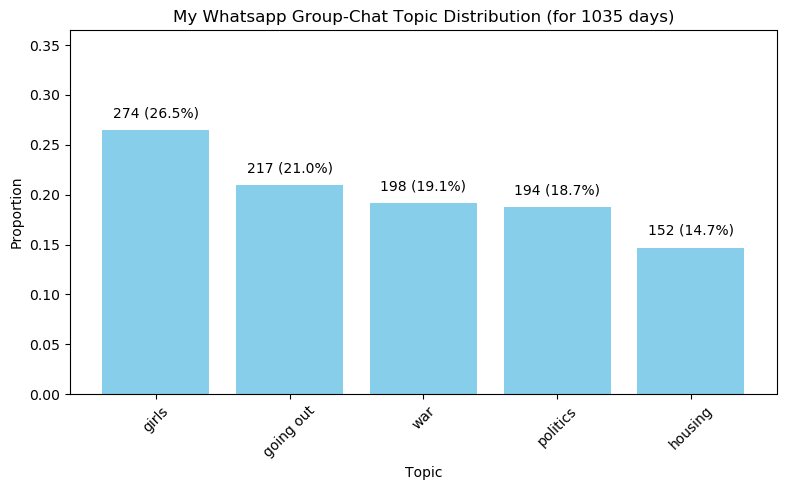

In [227]:
# Get raw counts and normalized proportions
topic_counts = df2.final_topic.value_counts()
topic_proportions = df2.final_topic.value_counts(normalize=True)

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(topic_counts.index, topic_proportions, color='skyblue')

# Annotate bars with raw counts and percentages
for bar, count, proportion in zip(bars, topic_counts, topic_proportions):
    height = bar.get_height()
    percentage = f'{proportion * 100:.1f}%'  # format to 1 decimal place
    label = f'{count} ({percentage})'
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, label,
             ha='center', va='bottom', fontsize=10)

# Plot formatting
plt.title(f'My Whatsapp Group-Chat Topic Distribution (for {len(df2)} days)')
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.ylim(0, topic_proportions.max() + 0.1)  # room for text above bars
plt.tight_layout()
plt.show()


In [225]:
i =110
print(f"topic: {df2.loc[i, 'final_topic']}\n{df2.loc[i, 'conversation']}")


topic: politics
עומר: זהו חברים זה עובר עומר: למה אנחנו שקטים עומר: מחר עובר חוק הדיקטטורה עומר: אכלנו את הלקרדה עמית: נראה לי שרק חוק הנבצרות עמית: עושים פה בדיקה איך בגצ יגיבו איתי: https://twitter.com/AvishayBenHaim/status/1638271186109886464?t=h3iUB9BOLbWjkO4CTzbByA&s=08 איתי: מה איתי: איפה הוא עשה דוקטורט איתי: בפקולטה למטורללים אורי: חחחחחח עומר: יש מחר ב-19:00 הפגנה נכון? עומר: כי ביטלתי מופע שאני הולך אליו עומר: כבר לא הולך אליו עומר: יש מחר צעדות הורים בבוקר, איתי: תשמעו איזה מטורלל איתי: שהרעיון של הגבלת כהונה לשתי קדנציות כבר עף מהחלון איתי: ורק מחוקקים עוד חוקים להשארת נתניהו בשלטון\ איתי: יואו כמה שאני שונא שאני מצביע ליאיר לפיד איתי: איזה תירוץ בעולם יש לו שיהיה מספיק טוב להסביר את זה שהוא לא דחף לקדם חקיקה להגבלת כהונה איתי: במיוחד לאור זה שהוא לא הפסיק לזיין על זה את השכל בקמפיינים לפני הבחירות ושזה חובה איתי: לוין נכנס לתפקיד שר משפטים, תוך חודשיים מקדם עושה הפיכה משטרית איתי: לפיד לא קידם חוק אחד עומר: שמע גם ביבי לא ברור לי עומר: הבן אדם מעריץ את המילטון עומר: האב המ